# EDA and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import csv

np.random.seed(42)
%matplotlib inline

## Load the data
- Set the index to column Id

In [2]:
df = pd.read_csv('../data/train.csv', index_col='Id')

## Preview the data

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Inspect the Data

In [4]:
df.dtypes

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

## Rename the column names

In [5]:
df.columns = df.columns.map(lambda x: x.replace(' ', '_').replace('/', '_').lower())

## Check the dataframe for null values

In [6]:
df.columns[df.isnull().any()]

Index(['lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area',
       'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature'],
      dtype='object')

## Plot the null columns by percentage of missing null values

In [7]:
null_columns = df.columns[df.isnull().any()]

In [8]:
y_values = [df[col].isnull().sum()/len(df)*100 for col in null_columns]
x_values = [col for col in df.columns[df.isnull().any()]]

In [9]:
null_dict = {'category': x_values, 'percentage': y_values}
null_df = pd.DataFrame(null_dict)

In [10]:
null_df.sort_values(['percentage'], ascending=True, inplace=True)

In [11]:
# ax = null_df.plot(x='category', y='percentage', kind='barh', figsize=(20,15), color='blue') 
# for p in ax.patches:
#     ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), 
#                                          p.get_y()), xytext=(5, 5), textcoords='offset points')
    
# plt.title('The Percentage of Missing Values in Columns', fontsize=30)
# plt.xlabel('Percentage (%)', fontsize=25)
# plt.ylabel('Columns', fontsize=25)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.legend(loc=(0.8,0.5), fontsize=20)
# plt.show();

## Fill in missing values appropriately using Domain Knowledge

### Pool
- We filled *pool_qc* null values with 0.
- We filled *pool_area* null values with 0.

In [12]:
df.pool_qc.isnull().sum()

2042

In [13]:
df.pool_qc.fillna(0, inplace=True)

In [14]:
df.pool_area.isnull().sum()

0

In [15]:
df.pool_area.fillna(0, inplace=True)

### MISC Features not covered in other categories
- We filled *misc_feature* null values with 'Na'.
- We filled *misc_val* null values with 0.

In [16]:
df.misc_feature.isnull().sum()

1986

In [17]:
df.misc_feature.fillna('Na', inplace=True)

In [18]:
df.misc_val.isnull().sum()

0

In [19]:
df.misc_val.fillna(0, inplace=True)

### Alley
- We filled the *alley* null values with 'Na'.

In [20]:
df.alley.isnull().sum()

1911

In [21]:
df.alley.fillna('Na', inplace=True)

### Fence Quality
- We filled *fence* null values with 'Na'

In [22]:
df.fence.isnull().sum()

1651

In [23]:
df.fence.fillna('Na', inplace=True)

### Fireplace Quality
- We checked that the rows with null values in *fireplace_qu* has no fireplace in *fireplace_qu*.
- We filled null values with 'Na'.

In [24]:
df.fireplace_qu.isnull().sum()

1000

In [25]:
df['fireplace_qu'].fillna('Na', inplace=True)

### Lot Frontage
- We filled null values with 0.

In [26]:
df.lot_frontage.isnull().sum()

330

In [27]:
df.lot_frontage.fillna(0, inplace=True)

### Garage 
- We found one house that which had a null value in *garage_cars* and there wasn't enough informative data from other garage features to fill in the data and we dropped that row.
- We found 114 houses with null values in yr_blt, type, cond, qual, finish, and area.
- We filled the yr_blt, type, cond, qual, finish with 'Na' and area with 0.

In [28]:
df.garage_yr_blt.isnull().sum()

114

In [29]:
df.garage_cars.isnull().sum()

1

In [30]:
df[df.garage_cars.isnull()].garage_yr_blt

Id
2237   NaN
Name: garage_yr_blt, dtype: float64

In [31]:
df[df.garage_cars.isnull()].garage_type

Id
2237    Detchd
Name: garage_type, dtype: object

In [32]:
df[df.garage_cars.isnull()].garage_cond

Id
2237    NaN
Name: garage_cond, dtype: object

In [33]:
df[df.garage_cars.isnull()].garage_qual

Id
2237    NaN
Name: garage_qual, dtype: object

In [34]:
df[df.garage_cars.isnull()].garage_finish

Id
2237    NaN
Name: garage_finish, dtype: object

In [35]:
df[df.garage_cars.isnull()].garage_area

Id
2237   NaN
Name: garage_area, dtype: float64

In [36]:
df.garage_type.isnull().sum()

113

In [37]:
df.garage_cond.isnull().sum()

114

In [38]:
df.garage_qual.isnull().sum()

114

In [39]:
df.garage_finish.isnull().sum()

114

In [40]:
df.garage_area.isnull().sum()

1

In [41]:
df.drop(2237, inplace=True)

In [42]:
df.reset_index(drop=True, inplace=True)

In [43]:
df['garage_type'].fillna('Na', inplace=True)
df['garage_qual'].fillna('Na', inplace=True)
df['garage_cond'].fillna('Na', inplace=True)
df['garage_finish'].fillna('Na', inplace=True)
df['garage_area'].fillna(0, inplace=True)
df['garage_yr_blt'].fillna(0, inplace=True)

### Masonry Veneer
- We filled *mas_vnr_type* null values with 'None' and *mas_vnr_area* with 0 because we assumed having null values in both area and type means no masonry veneer.

In [44]:
df['mas_vnr_type'].isnull().sum()

22

In [45]:
df['mas_vnr_area'].isnull().sum()

22

In [46]:
df[df['mas_vnr_type'].isnull()]['mas_vnr_area']

22     NaN
41     NaN
86     NaN
212    NaN
276    NaN
338    NaN
431    NaN
451    NaN
591    NaN
844    NaN
913    NaN
939    NaN
1025   NaN
1244   NaN
1306   NaN
1430   NaN
1434   NaN
1606   NaN
1699   NaN
1814   NaN
1819   NaN
1940   NaN
Name: mas_vnr_area, dtype: float64

In [47]:
df['mas_vnr_type'].fillna('None', inplace=True)

In [48]:
df['mas_vnr_area'].fillna(0, inplace=True)

### Basement
- We filled the qual, cond, exposure, type_1, type_2 with 'Na' because there is not enough informative data to fill with other values.
- We filled sf and bath null values with 0 because the houses have 'Na' in other basement features.

In [49]:
df[['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 
    'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']].isnull().sum()

bsmt_qual         55
bsmt_cond         55
bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_type_2    56
bsmtfin_sf_1       1
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
bsmt_full_bath     2
bsmt_half_bath     2
dtype: int64

In [50]:
df['bsmt_qual'].fillna('Na', inplace=True)
df['bsmt_cond'].fillna('Na', inplace=True)
df['bsmt_exposure'].fillna('Na', inplace=True)
df['bsmtfin_type_1'].fillna('Na', inplace=True)
df['bsmtfin_type_2'].fillna('Na', inplace=True)
df['bsmtfin_sf_1'].fillna(0, inplace=True)
df['bsmtfin_sf_2'].fillna(0, inplace=True)
df['bsmt_unf_sf'].fillna(0, inplace=True)
df['total_bsmt_sf'].fillna(0, inplace=True)
df['bsmt_full_bath'].fillna(0, inplace=True)
df['bsmt_half_bath'].fillna(0, inplace=True)

## Recheck the dimensions of data

In [51]:
df.shape

(2050, 80)

## Change Datatypes accordingly

In [52]:
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

## Outliers

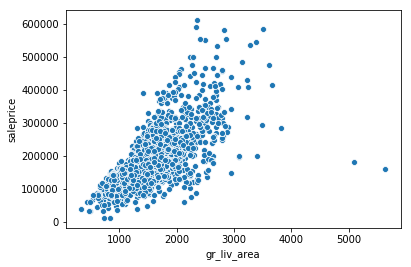

In [53]:
sns.scatterplot(df.gr_liv_area, df.saleprice);

- There are two houses with greater than 4000 sqft in living area and are very low in sale price.

In [54]:
mask = df['gr_liv_area'] > 4000

- create a mask to select those houses

In [55]:
for row in df[mask].index:
    df.drop(row, inplace=True)

- drop the outliers

## Preprocessing and Feature Engineering

In [56]:
# def subplot_scatterplot(dataframe, x_list, y_list, titles, x_label, y_label, color='green'):
#     nrows = int(np.ceil(len(x_list)/3))
#     fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(25,8))
#     ax = ax.ravel()
#     for i, x in enumerate(x_list):
#         ax[i].scatter(dataframe[x], dataframe[y_list[i]], color=color)
#         ax[i].set_title(list_of_titles[i], fontsize=27)
#         ax[i].set_ylabel(y_label[i], fontsize=20)
#         ax[i].set_xlabel(x_label[i], fontsize=20)

In [57]:
# def subplot_swarmplot(dataframe, x_list, y_list, titles, x_label, y_label, color='green'):
#     fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
#     axes = [ax1, ax2]
#     for i, x in enumerate(x_list): 
#         sns.swarmplot(dataframe[x], dataframe[y_list[i]], color=color, ax=axes[i])
#         ax.set_title(titles[i], fontsize=30)
#         ax.set_ylabel(y_label[i], fontsize=20)
#         ax.set_xlabel(x_label[i], fontsize=20)

In [58]:
def basicScatterPlot(feature):
    plt.figure(figsize=(10,5))
    plt.title(f'Scatterplot of {feature} vs Saleprice', fontsize=25)
    plt.scatter(df[feature], df.saleprice)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=15)
    plt.xlabel(f'{feature}', fontsize=15)
    plt.ylabel('saleprice', fontsize=15);

In [59]:
def basicSwarmPlot(feature):
    plt.figure(figsize=(10,5))
    plt.title(f'Swarmplot of {feature} vs Saleprice', fontsize=25)
    sns.swarmplot(df[feature], df.saleprice)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=15)
    plt.xlabel(f'{feature}', fontsize=15)
    plt.ylabel('saleprice', fontsize=15);

- Function for visualizing distribution of values by swarmplot.

In [60]:
def basicHistogram(feature):
    plt.figure(figsize=(10,5))
    plt.title(f'Histogramplot of {feature}', fontsize=25)
    plt.hist(df[feature])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=15)
    plt.xlabel(f'{feature}', fontsize=15)
    plt.ylabel(f'Count of {feature}', fontsize=15);

- Function for visualizing distribution of values by histogram.

### PID
- We dropped PID columns because we made the *Id* column the index.

### Living Area

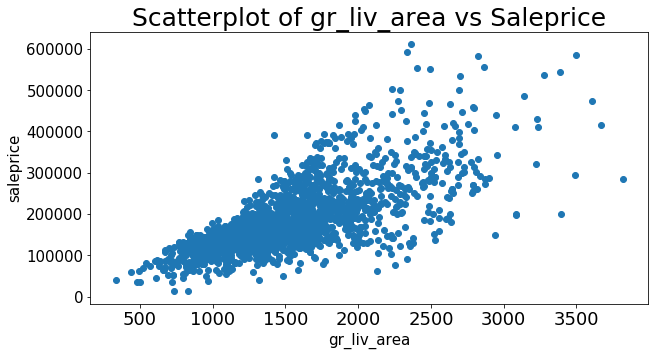

In [61]:
basicScatterPlot('gr_liv_area')

- This scatterplot indicates that there is an approximate linear relationship between living ground area and saleprice which I think is an important feature.

### Overall Quality and Condition

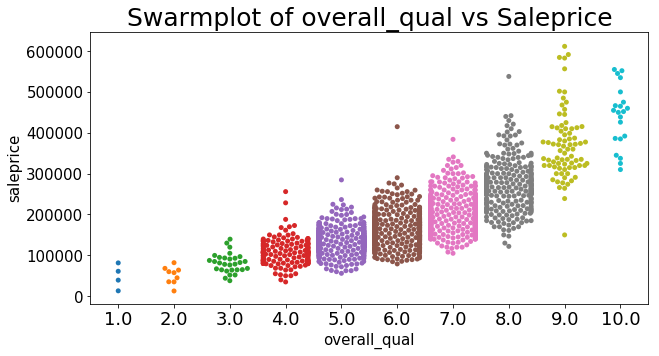

In [62]:
basicSwarmPlot('overall_qual')

- This swarmplot of distribution indicates that there is an approximate linear relationship between overall quality and saleprice and hints at being an important feature.
- Features describing the quality might be distributed well and be a great predictor at saleprice
- will be keeping quality features

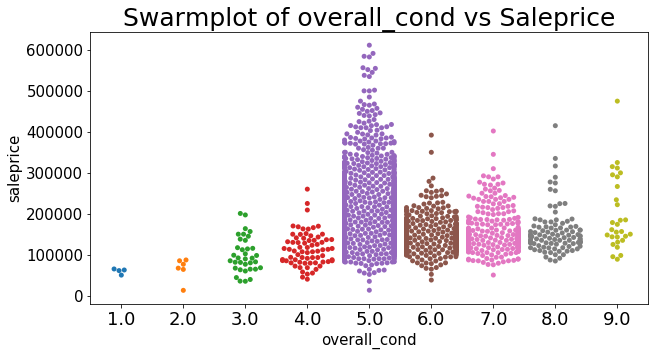

In [63]:
basicSwarmPlot('overall_cond')

- This swarmplot of distribution indicates that there is not an approximate linear relationship between overall quality and saleprice and hints at being a meaningless feature.
- Features describing conditions might be distributed poorly and be a terrible predictor at sale price, will need to do more investigation
- conditional features are possibly poorly distributed

### Exterior

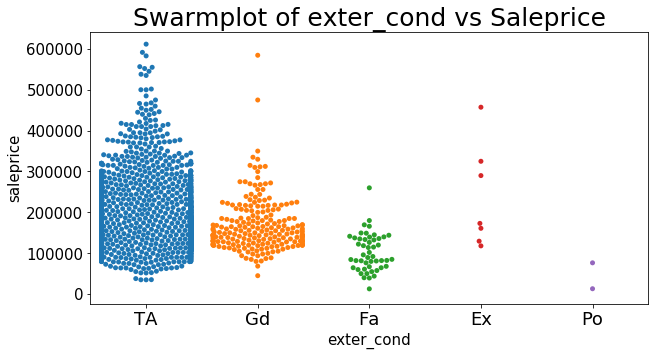

In [64]:
basicSwarmPlot('exter_cond')

- This swarmplot of distribution indicates that the exterior condition is poorly distributed and does not represent the houses well and including them will bias our data and model.
- Again, condition appears to be poorly distributed.
- Will be dropping all features describing conditions

### Basement

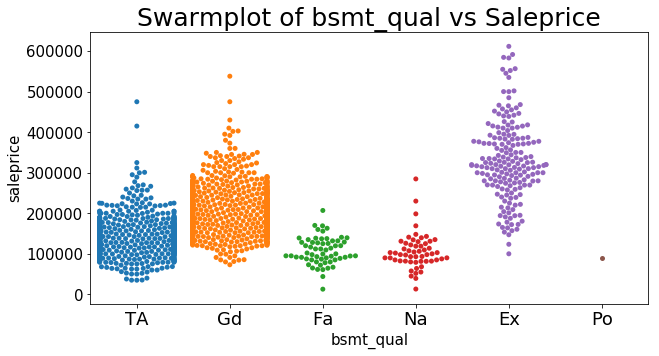

In [65]:
basicSwarmPlot('bsmt_qual')

- This swarmplot of distribution indicates that the basment quality is well distributed and it appears that the excellent basements have the highest sale price.
- again, features describing quality are well distributed

### Kitchen

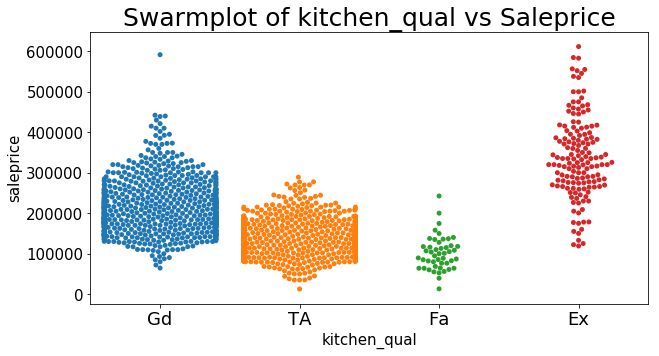

In [66]:
basicSwarmPlot('kitchen_qual')

- This swarmplot of distribution indicates that the kitchen quality is well distributed and it appears that the excellent basements have the highest sale price.
- again, features describing quality are well distributed
- will be keeping quality features

### Electrical

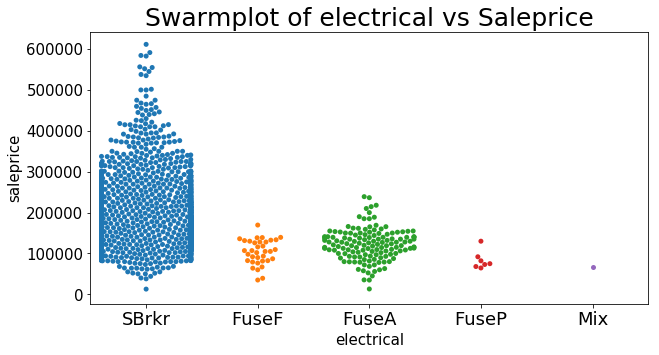

In [67]:
basicSwarmPlot('electrical')

- This swarmplot of distribution indicates that electricals is poorly distributed and does not represent the houses well and including them will bias our data and model.
- features describing type appear to be poorly distributed

### Foundation

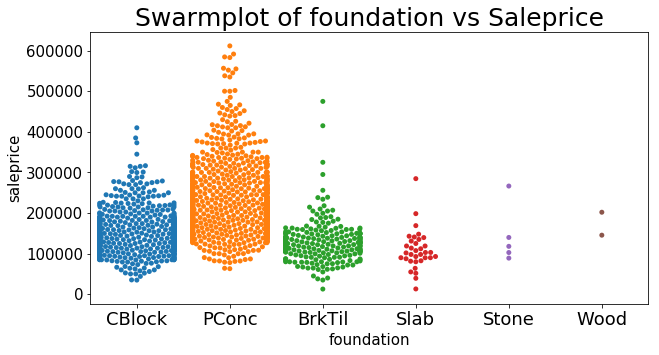

In [68]:
basicSwarmPlot('foundation')

- This swarmplot of distribution indicates that the foundation is poorly distributed and does not represent the houses well and including them will bias our data and model.
- exterior building features are poorly distributed

### Pool

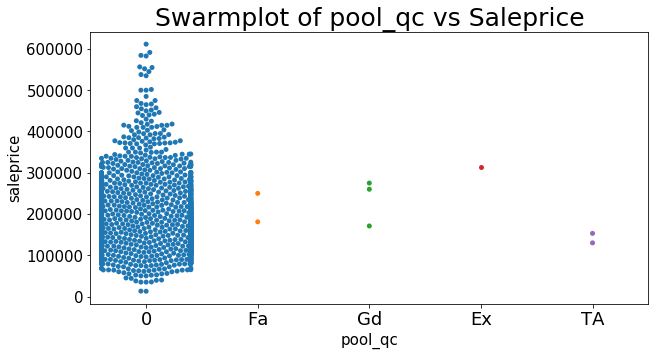

In [69]:
basicSwarmPlot('pool_qc')

- This swarmplot of distribution indicates that the pool quality is poorly distributed and does not represent the houses well and including them will bias our data and model.
- again, exterior building features are poorly distributed
- will be dropping exterior building features

### Garage Area

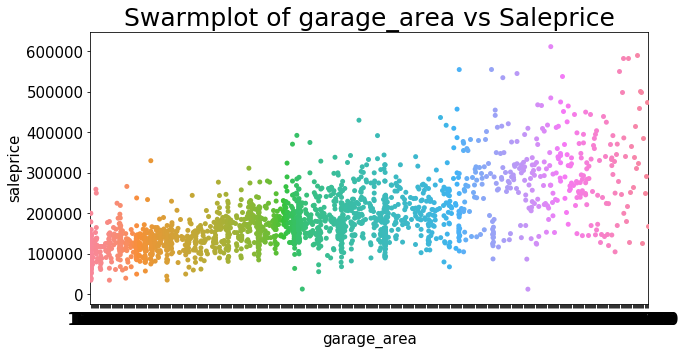

In [70]:
basicSwarmPlot('garage_area')

- This swarmplot of distribution indicates that the garage area is well distributed and it appears that the greater the area, the greater the sale price.

### Rooms

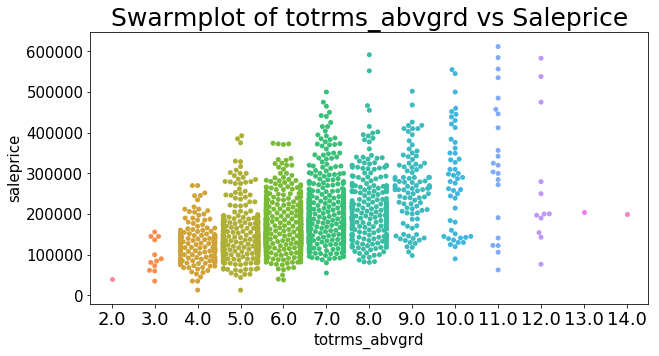

In [71]:
basicSwarmPlot('totrms_abvgrd')

- This swarmplot of distribution indicates that the total rooms above ground is well distributed and it appears that the greater the total number, the greater the sale price.

- This swarmplot of distribution indicates that the year remodeled is well distributed and it appears that the greater the year, the greater the sale price.

### Plot Heatmap of Correlation between Predictors and Target
- Selected the features that have a correlation of greater than 0.1 with *saleprice*

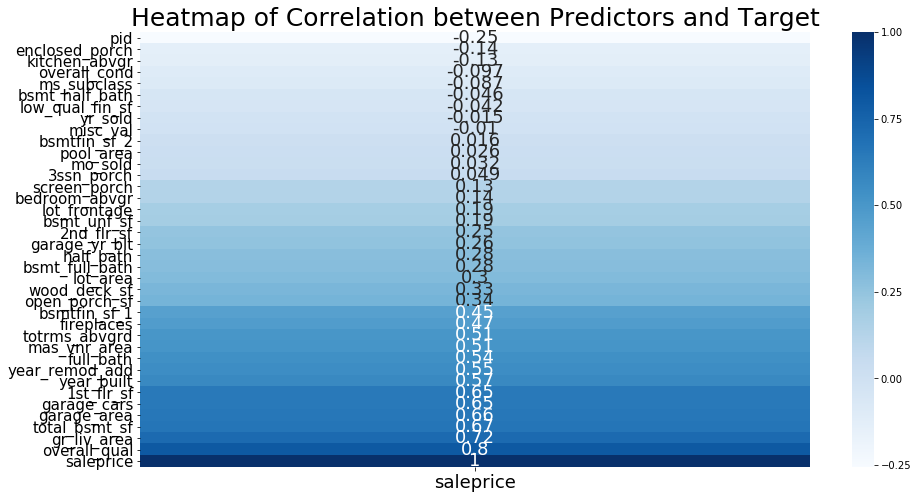

In [72]:
plt.figure(figsize=(15,8))
plt.title('Heatmap of Correlation between Predictors and Target', fontsize=25)
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'), 
            cmap='Blues', annot=True, annot_kws={"size": 18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=15);

In [73]:
heatmap_col = [feature for feature in df.corr()[['saleprice']].index]

In [74]:
high_corr = []
for col in heatmap_col:
    if abs(df.corr().loc[col, 'saleprice']) > 0.5:
        high_corr.append(col)

In [75]:
high_corr

['overall_qual',
 'year_built',
 'year_remod_add',
 'mas_vnr_area',
 'total_bsmt_sf',
 '1st_flr_sf',
 'gr_liv_area',
 'full_bath',
 'totrms_abvgrd',
 'garage_cars',
 'garage_area',
 'saleprice']

## Feature Selection

- Will be dropping features pertaining to:
    - condition
    - type
    - exterior of building

- Will be keeping features pertaining to:
    - quality
    - primary living space
    - number of rooms

In [76]:
final_col = []

In [77]:
for col in high_corr:
    if col != '1st_flr_sf':
        if col != 'year_built':
            final_col.append(col)

In [78]:
final_col

['overall_qual',
 'year_remod_add',
 'mas_vnr_area',
 'total_bsmt_sf',
 'gr_liv_area',
 'full_bath',
 'totrms_abvgrd',
 'garage_cars',
 'garage_area',
 'saleprice']

In [79]:
for col in df.columns:
    if col != 'pool_qc':
        if 'qual' in col:
            final_col.append(col)
        elif 'qc' in col:
            final_col.append(col)

In [80]:
final_col = set(final_col)

In [81]:
final_col = list(final_col)

In [82]:
df = df[final_col]

In [83]:
df.columns

Index(['low_qual_fin_sf', 'overall_qual', 'saleprice', 'garage_area',
       'heating_qc', 'garage_cars', 'exter_qual', 'year_remod_add',
       'bsmt_qual', 'garage_qual', 'full_bath', 'total_bsmt_sf',
       'mas_vnr_area', 'gr_liv_area', 'totrms_abvgrd', 'kitchen_qual'],
      dtype='object')

## Creating dummy columns for categorical columns

In [84]:
obj_mask = (df.dtypes == np.object)

In [85]:
obj_columns = df.columns[obj_mask]

- Make a mask for categorical features.

In [86]:
df_dummies = pd.get_dummies(df, columns = obj_columns)

- One hot encode categorical features.

In [87]:
df_dummies.head()

,low_qual_fin_sf,overall_qual,saleprice,garage_area,garage_cars,year_remod_add,full_bath,total_bsmt_sf,mas_vnr_area,gr_liv_area,...,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Na,garage_qual_Po,garage_qual_TA,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
0,0.0,6.0,130500.0,475.0,2.0,2005.0,2.0,725.0,289.0,1479.0,...,0,0,0,0,0,1,0,0,1,0
1,0.0,7.0,220000.0,559.0,2.0,1997.0,2.0,913.0,132.0,2122.0,...,0,0,0,0,0,1,0,0,1,0
2,0.0,5.0,109000.0,246.0,1.0,2007.0,1.0,1057.0,0.0,1057.0,...,0,0,0,0,0,1,0,0,1,0
3,0.0,5.0,174000.0,400.0,2.0,2007.0,2.0,384.0,0.0,1444.0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,6.0,138500.0,484.0,2.0,1993.0,2.0,676.0,0.0,1445.0,...,0,0,0,0,0,1,0,0,0,1


## Create our features matrix (`X`) and target vector (`y`)

In [88]:
features = [col for col in df_dummies.columns if col != 'saleprice']
X = df_dummies[features]
y = df_dummies['saleprice']

In [89]:
X.head()

,low_qual_fin_sf,overall_qual,garage_area,garage_cars,year_remod_add,full_bath,total_bsmt_sf,mas_vnr_area,gr_liv_area,totrms_abvgrd,...,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Na,garage_qual_Po,garage_qual_TA,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
0,0.0,6.0,475.0,2.0,2005.0,2.0,725.0,289.0,1479.0,6.0,...,0,0,0,0,0,1,0,0,1,0
1,0.0,7.0,559.0,2.0,1997.0,2.0,913.0,132.0,2122.0,8.0,...,0,0,0,0,0,1,0,0,1,0
2,0.0,5.0,246.0,1.0,2007.0,1.0,1057.0,0.0,1057.0,5.0,...,0,0,0,0,0,1,0,0,1,0
3,0.0,5.0,400.0,2.0,2007.0,2.0,384.0,0.0,1444.0,7.0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,6.0,484.0,2.0,1993.0,2.0,676.0,0.0,1445.0,6.0,...,0,0,0,0,0,1,0,0,0,1


## Train/Test Split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

## Creating Scaler

In [91]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

## Export data and scaler for use in other notebooks

In [93]:
with open('../data/X_train_sc.csv', 'w+') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerows(X_train_sc)

In [94]:
with open('../data/X_test_sc.csv', 'w+') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerows(X_test_sc)

In [95]:
y_train.to_csv('../data/y_train.csv', index=False, header=False)

In [96]:
y_test.to_csv('../data/y_test.csv', index=False, header=False)

## Pickle the Scaler and Columns

In [97]:
with open('../assets/scaler.pkl', 'wb+') as f:
    pickle.dump(ss, f)

In [98]:
with open('../assets/columns.pkl', 'wb+') as f:
    pickle.dump(list(X.columns), f)

In [99]:
with open('../assets/kaggle_columns.pkl', 'wb+') as f:
    pickle.dump(list(df.drop('saleprice', axis=1).columns), f)